<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [0]:
bank = pd.read_csv("bank-additional-full.csv", sep = ";")

In [9]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


  1. age (__numeric__)
  2. job : type of job (__categorical__: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
  3. marital : marital status (__categorical__: "divorced","married","single","unknown"; 
    - note: "divorced" means divorced or widowed)
  4. education (__categorical__: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  5. default: has credit in default? (__categorical__: "no","yes","unknown")
  6. housing: has housing loan? (__categorical__: "no","yes","unknown")
  7. loan: has personal loan? (__categorical__: "no","yes","unknown")
  8. contact: contact communication type (__categorical__: "cellular","telephone") 
  9. month: last contact month of year (__categorical__: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (__categorical__: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (__numeric__).
    - Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  12. campaign: number of contacts performed during this campaign and for this client (__numeric__, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (__numeric__; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (__numeric__)
  15. poutcome: outcome of the previous marketing campaign (__categorical__: "failure","nonexistent","success")
  16. emp.var.rate: employment variation rate - quarterly indicator (__numeric__)
  17. cons.price.idx: consumer price index - monthly indicator (__numeric__)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (__numeric__)     
  19. euribor3m: euribor 3 month rate - daily indicator (__numeric__)
  20. nr.employed: number of employees - quarterly indicator (__numeric__)

# Output variable (desired target):
  21. y - has the client subscribed a term deposit? (__binary__: "yes","no")

In [10]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
bank.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [0]:
# LabelEncoding using apply function and index function to set an order.

bank.education = bank.education.apply(lambda x: ["unknown","basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"].index(x))
bank.poutcome = bank.poutcome.apply(lambda x: ["failure","nonexistent","success"].index(x))

In [13]:
# change 999 pday into 0

bank.pdays.loc[bank.pdays == 999,] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# stadardizing numeric value
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
numeric_col = bank.select_dtypes(["float64","int64"]).columns
bank[numeric_col] = std.fit_transform(bank[numeric_col])

In [16]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,-1.532523,no,no,no,telephone,may,mon,0.010471,-0.565922,-0.164012,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,-0.184645,unknown,no,no,telephone,may,mon,-0.421501,-0.565922,-0.164012,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,-0.184645,no,yes,no,telephone,may,mon,-0.124520,-0.565922,-0.164012,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,-1.083231,no,no,no,telephone,may,mon,-0.413787,-0.565922,-0.164012,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,-0.184645,no,no,yes,telephone,may,mon,0.187888,-0.565922,-0.164012,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,no


In [17]:
bank.shape

(41188, 21)

In [0]:
# train/test split 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = bank.drop(columns= "y", axis = 1)
y = le.fit_transform(bank.y)

# one-hot-encoding categorical value
X = pd.get_dummies(X)

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [22]:
train_X.shape

(28831, 54)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 54, kernel_initializer='normal'))
model.add(layers.Dense(32, activation='relu', kernel_initializer='normal'))
model.add(layers.Dense(1, activation= 'sigmoid', kernel_initializer='normal'))

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               14080     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 22,337
Trainable params: 22,337
Non-trainable params: 0
_________________________________________________________________


In [27]:
# training outcome 
model.fit(train_X, train_y, epochs=5, batch_size = 32)

Epoch 1/5
28831/28831 [==============================] - 2s 61us/step - loss: 0.2110 - accuracy: 0.9062
Epoch 2/5
28831/28831 [==============================] - 1s 47us/step - loss: 0.1860 - accuracy: 0.9114
Epoch 3/5
28831/28831 [==============================] - 1s 45us/step - loss: 0.1806 - accuracy: 0.9134
Epoch 4/5
28831/28831 [==============================] - 1s 45us/step - loss: 0.1772 - accuracy: 0.9154
Epoch 5/5
28831/28831 [==============================] - 1s 45us/step - loss: 0.1742 - accuracy: 0.9167


In [28]:
# show the validation outcome (accuracy) using test_X and test_y
history = model.fit(train_X, train_y, epochs= 5, validation_data= (test_X, test_y), batch_size= 32)

Train on 28831 samples, validate on 12357 samples
Epoch 1/5
28831/28831 [==============================] - 2s 58us/step - loss: 0.1717 - accuracy: 0.9185 - val_loss: 0.1771 - val_accuracy: 0.9171
Epoch 2/5
28831/28831 [==============================] - 2s 59us/step - loss: 0.1690 - accuracy: 0.9195 - val_loss: 0.1768 - val_accuracy: 0.9183
Epoch 3/5
28831/28831 [==============================] - 2s 60us/step - loss: 0.1664 - accuracy: 0.9216 - val_loss: 0.1793 - val_accuracy: 0.9172
Epoch 4/5
28831/28831 [==============================] - 2s 58us/step - loss: 0.1636 - accuracy: 0.9224 - val_loss: 0.1809 - val_accuracy: 0.9196
Epoch 5/5
28831/28831 [==============================] - 2s 58us/step - loss: 0.1608 - accuracy: 0.9237 - val_loss: 0.1800 - val_accuracy: 0.9166


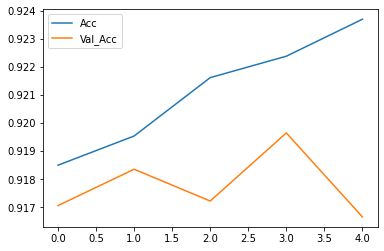

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label = "Acc")
plt.plot(history.history["val_accuracy"], label = "Val_Acc")
plt.legend()